In [1]:
!pip install -r requirements.txt

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [3]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
train_data

,DEATH_EVENT,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,0,70.0,0,835,0,35,1,305000.00,0.80,133,0,0,145
1,0,79.0,1,55,0,50,1,172000.00,1.80,133,1,0,78
2,0,40.0,0,478,1,30,0,303000.00,0.90,136,1,0,148
3,0,45.0,1,66,1,25,0,233000.00,0.80,135,1,0,230
4,1,73.0,0,582,0,20,0,263358.03,1.83,134,1,0,198
...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,1,68.0,1,577,0,25,1,166000.00,1.00,138,1,0,43
187,1,69.0,0,582,0,20,0,266000.00,1.20,134,1,1,73
188,0,45.0,0,2060,1,60,0,742000.00,0.80,138,0,0,278
189,1,70.0,1,125,0,25,1,237000.00,1.00,140,0,0,15


In [4]:
train_data.dtypes

DEATH_EVENT                   int64
age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
dtype: object

age è un float64 e inoltre sono presenti alcuni valori anomali, come ad esempio 60.667. Si procede dunque con la trasformazione in int per normalizzare i dati. Ragionamento analogo anche per la feature platelets.

In [5]:
train_data['age'] = train_data['age'].astype('int64')
test_data['age'] = test_data['age'].astype('int64')
train_data['platelets'] = train_data['platelets'].astype('int64')
test_data['platelets'] = test_data['platelets'].astype('int64')

In [6]:
train_data.tail()

,DEATH_EVENT,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
186,1,68,1,577,0,25,1,166000,1.0,138,1,0,43
187,1,69,0,582,0,20,0,266000,1.2,134,1,1,73
188,0,45,0,2060,1,60,0,742000,0.8,138,0,0,278
189,1,70,1,125,0,25,1,237000,1.0,140,0,0,15
190,0,60,0,253,0,35,0,279000,1.7,140,1,0,250


In [7]:
test_data.tail()

,DEATH_EVENT,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
43,0,45,0,308,1,60,1,377000,1.00,136,1,0,186
44,0,45,0,582,1,55,0,543000,1.00,132,0,0,250
45,0,58,1,57,0,25,0,189000,1.30,132,1,1,205
46,0,50,1,54,0,40,0,279000,0.80,141,1,0,250
47,0,75,0,582,0,45,1,263358,1.18,137,1,0,87


In [8]:
train_X = train_data.drop("DEATH_EVENT",axis=1)
test_X = test_data.drop("DEATH_EVENT",axis=1)

In [9]:
y = train_data["DEATH_EVENT"]
y_test = test_data["DEATH_EVENT"]

In [10]:
train_X.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,70,0,835,0,35,1,305000,0.80,133,0,0,145
1,79,1,55,0,50,1,172000,1.80,133,1,0,78
2,40,0,478,1,30,0,303000,0.90,136,1,0,148
3,45,1,66,1,25,0,233000,0.80,135,1,0,230
4,73,0,582,0,20,0,263358,1.83,134,1,0,198


In [11]:
train_X.describe(include = "all")

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
count,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000
mean,60.633508,0.439791,626.471204,0.392670,38.251309,0.324607,259897.225131,1.394817,136.785340,0.659686,0.345550,132.628272
std,11.625368,0.497666,1036.722126,0.489628,11.794275,0.469459,95446.406152,1.035011,4.189083,0.475060,0.476797,77.522581
min,40.000000,0.000000,23.000000,0.000000,15.000000,0.000000,47000.000000,0.500000,113.000000,0.000000,0.000000,6.000000
25%,52.000000,0.000000,118.000000,0.000000,30.000000,0.000000,209000.000000,0.900000,134.000000,0.000000,0.000000,74.500000
50%,60.000000,0.000000,248.000000,0.000000,38.000000,0.000000,257000.000000,1.100000,137.000000,1.000000,0.000000,117.000000
75%,68.000000,1.000000,582.000000,1.000000,45.000000,1.000000,304500.000000,1.400000,140.000000,1.000000,1.000000,205.500000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,742000.000000,9.000000,146.000000,1.000000,1.000000,285.000000


Si procede con la divisione in fasce di eta. Solitamente il rischio di attacco cardiaco è maggiore per le fasce più alte.

In [12]:
train_X["age"] = train_X["age"].transform(lambda x : 1 if x >= 40 and x < 50 else x)
train_X["age"] = train_X["age"].transform(lambda x : 2 if x >= 50 and x < 60 else x)
train_X["age"] = train_X["age"].transform(lambda x : 3 if x >= 60 and x < 70 else x)
train_X["age"] = train_X["age"].transform(lambda x : 4 if x >= 70 and x < 80 else x)
train_X["age"] = train_X["age"].transform(lambda x : 5 if x >= 80 and x < 90 else x)
train_X["age"] = train_X["age"].transform(lambda x : 6 if x >= 90 else x)

test_X["age"] = test_X["age"].transform(lambda x : 1 if x >= 40 and x < 50 else x)
test_X["age"] = test_X["age"].transform(lambda x : 2 if x >= 50 and x < 60 else x)
test_X["age"] = test_X["age"].transform(lambda x : 3 if x >= 60 and x < 70 else x)
test_X["age"] = test_X["age"].transform(lambda x : 4 if x >= 70 and x < 80 else x)
test_X["age"] = test_X["age"].transform(lambda x : 5 if x >= 80 and x < 90 else x)
test_X["age"] = test_X["age"].transform(lambda x : 6 if x >= 90 else x)

train_X

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,4,0,835,0,35,1,305000,0.80,133,0,0,145
1,4,1,55,0,50,1,172000,1.80,133,1,0,78
2,1,0,478,1,30,0,303000,0.90,136,1,0,148
3,1,1,66,1,25,0,233000,0.80,135,1,0,230
4,4,0,582,0,20,0,263358,1.83,134,1,0,198
...,...,...,...,...,...,...,...,...,...,...,...,...
186,3,1,577,0,25,1,166000,1.00,138,1,0,43
187,3,0,582,0,20,0,266000,1.20,134,1,1,73
188,1,0,2060,1,60,0,742000,0.80,138,0,0,278
189,4,1,125,0,25,1,237000,1.00,140,0,0,15


Si è notato inoltre, osservando l'intero dataset, che i pazienti che aveva un time relativamente basso (inferiore circa a 70) sono deceduti con maggiore frequenza.

Per via delle dimensioni assai ridotte del dataset, si è scelto di adoperare una LogisticRegression con cross validation. Nelle varie sperimentazioni, usando diversi split, si è notato che il più delle volte la cross validation offriva una accuracy maggiore.
Per default il K-Folds per la LogistcRegressionCV è 5.

In [13]:
log = LogisticRegressionCV(random_state=10,max_iter=1000)
log.fit(train_X, y)
print("\n Test Accuracy: ", (log.score(test_X, y_test) * 100), "%")


 Test Accuracy:  85.41666666666666 %


Infine si sono analizzate le performance del modello con una matrice di confusione. Come si può ben notare la morte di un paziente non è sempre stata predetta con una precisione soddisfacente. Il numero elevato di falsi positivi è da inputare non solo dal numero veramente basso di dati, ma anche dalla loro distribuzione in base al valore di DEATH_EVENT: infatti ci sono pochissime occorrenze con DEATH_EVENT pari a 1.

Text(0.5, 12.5, 'Predicted label')

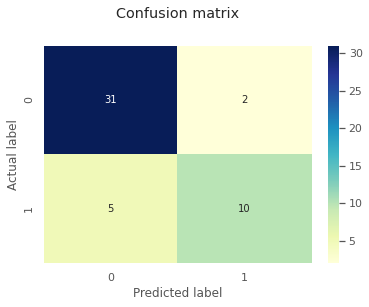

In [14]:
y_pred = log.predict(test_X)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [15]:
#!pip freeze > requirements.txt